In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Preparation:

In [3]:
pd.read_excel('/kaggle/input/heart-disease/heart_disease.xlsx')

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [4]:
hd=pd.read_excel('/kaggle/input/heart-disease/heart_disease.xlsx',sheet_name='Heart_disease')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


## Exploratory Data Analysis (EDA):

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
hd.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
hd.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
hd1=hd.dropna()
hd1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [9]:
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [10]:
hd1.shape

(846, 13)

<Axes: >

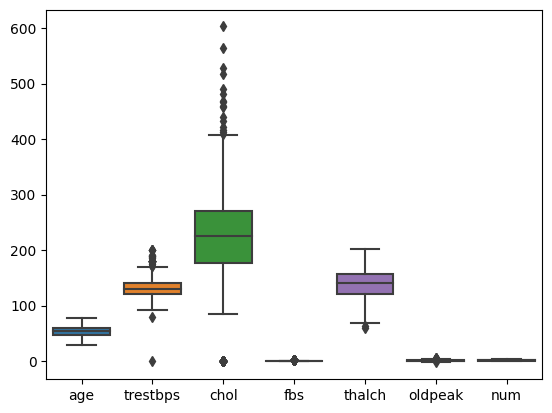

In [11]:
sns.boxplot(hd1)

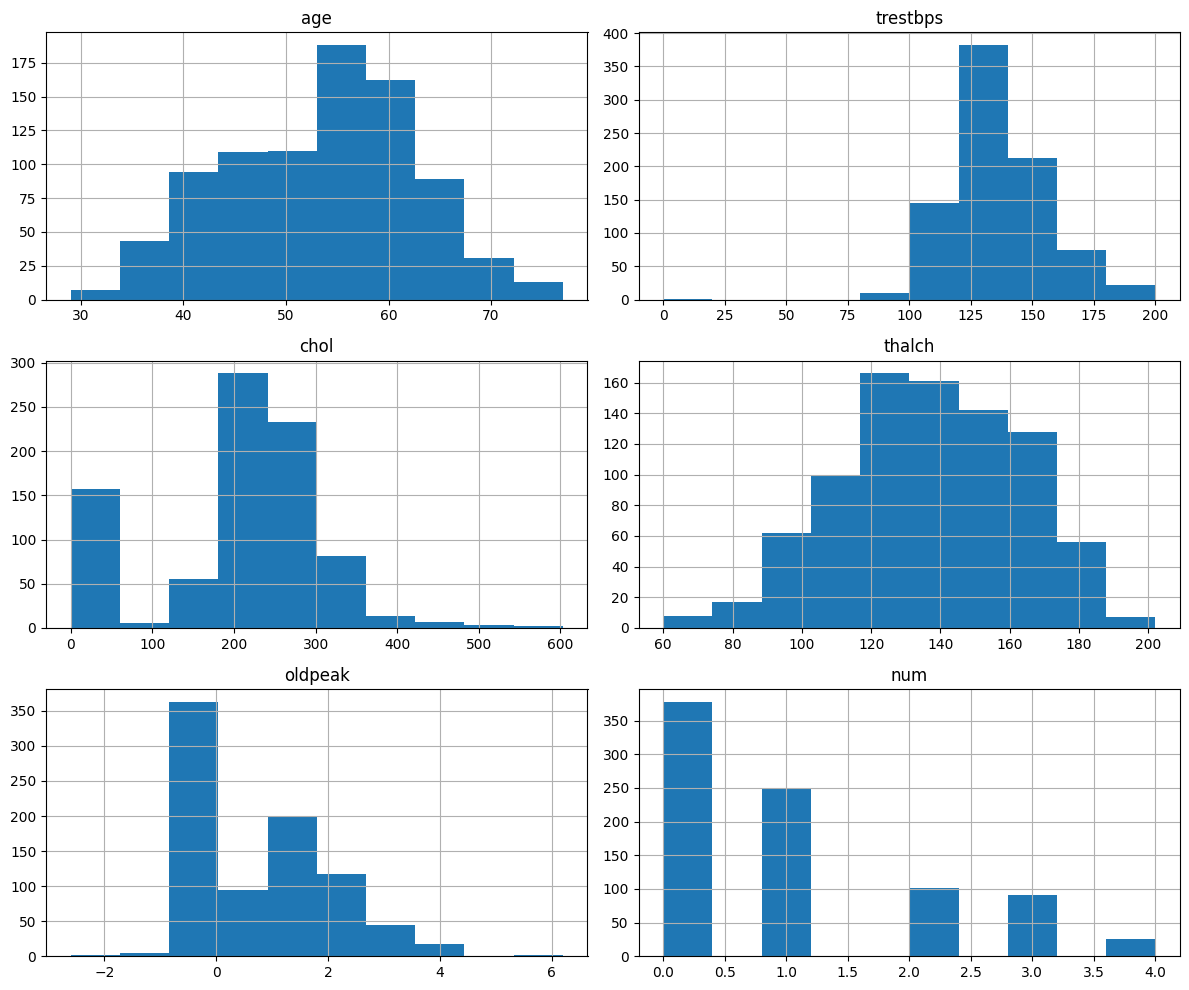

In [12]:
hd1.hist(figsize=(12, 10))
plt.tight_layout()

In [13]:
hd_num=hd1[['age','trestbps','chol','thalch','oldpeak','num']]
hd_num

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
901,51,110,0,92,0.0,4
902,62,160,254,108,3.0,4
903,53,125,0,120,1.5,4
904,62,166,170,120,3.0,4


Text(0.5, 1.0, 'Correlation Matrix')

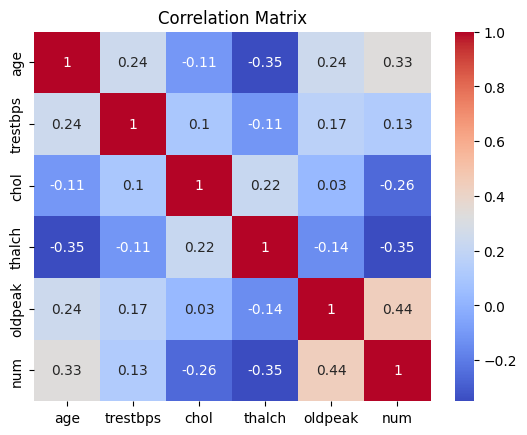

In [14]:
correlation_matrix = hd_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

## Feature Engineering

In [15]:
hd1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    int64  
 1   sex       846 non-null    object 
 2   cp        846 non-null    object 
 3   trestbps  846 non-null    int64  
 4   chol      846 non-null    int64  
 5   fbs       846 non-null    bool   
 6   restecg   846 non-null    object 
 7   thalch    846 non-null    int64  
 8   exang     846 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     846 non-null    object 
 11  thal      846 non-null    object 
 12  num       846 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.7+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
hd1.exang.value_counts()

exang
False    512
True     333
FALSE      1
Name: count, dtype: int64

In [18]:
hd1['exang'] = hd1['exang'].replace('FALSE', False)

In [19]:
hd1.exang.value_counts()

exang
False    513
True     333
Name: count, dtype: int64

In [20]:
cols=['sex','cp','restecg','exang','fbs','slope','thal']
label_encoder = LabelEncoder()
for col in cols:
    hd1[col] = label_encoder.fit_transform(hd1[col])
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,1,1,92,0,0.0,1,0,4
902,62,1,0,160,254,1,2,108,1,3.0,1,1,4
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4


## Decision Tree Classification

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,1,1,92,0,0.0,1,0,4
902,62,1,0,160,254,1,2,108,1,3.0,1,1,4
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4


In [23]:
hd1.num.value_counts()

num
0    378
1    250
2    101
3     91
4     26
Name: count, dtype: int64

In [24]:
X=hd1.iloc[:,:-1]
y=hd1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
701,69,1,2,140,254,0,0,146,0,2.0,1,2
669,66,1,1,160,246,0,1,120,1,0.0,1,0
593,57,1,0,128,0,1,2,148,1,1.0,1,0
836,43,1,0,100,0,0,1,122,0,1.5,0,1
562,49,1,0,130,341,0,1,120,1,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
72,47,1,2,138,257,0,0,156,0,0.0,2,1
107,46,0,1,105,204,0,1,172,0,0.0,2,1
271,53,0,2,120,274,0,1,130,0,0.0,2,2
457,70,1,0,115,0,0,2,92,1,0.0,1,2


In [25]:
hd1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    int64  
 1   sex       846 non-null    int64  
 2   cp        846 non-null    int64  
 3   trestbps  846 non-null    int64  
 4   chol      846 non-null    int64  
 5   fbs       846 non-null    int64  
 6   restecg   846 non-null    int64  
 7   thalch    846 non-null    int64  
 8   exang     846 non-null    int64  
 9   oldpeak   846 non-null    float64
 10  slope     846 non-null    int64  
 11  thal      846 non-null    int64  
 12  num       846 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 92.5 KB


In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

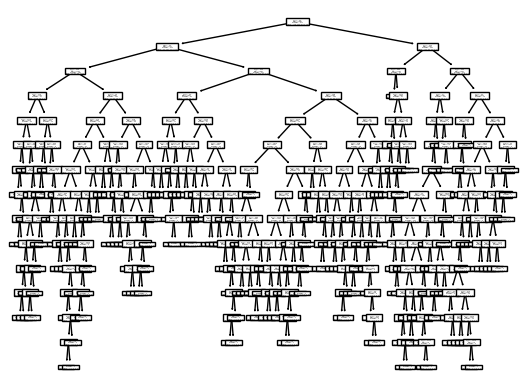

In [27]:
from sklearn import tree
tree.plot_tree(clf);

In [28]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 3, 1, 0,
       3, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 4, 0, 0, 0, 1,
       3, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 3, 0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 3, 1, 0, 2, 0, 0, 0, 3, 1, 1, 3, 0, 2, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 3, 0, 1, 0, 3, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 4, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 3, 1])

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5823529411764706


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        80
           1       0.41      0.59      0.48        41
           2       0.46      0.43      0.44        14
           3       0.29      0.15      0.20        27
           4       0.00      0.00      0.00         8

    accuracy                           0.58       170
   macro avg       0.39      0.39      0.38       170
weighted avg       0.55      0.58      0.56       170



In [31]:
print(confusion_matrix(y_test, y_pred))

[[65 11  1  2  1]
 [10 24  2  5  0]
 [ 4  4  6  0  0]
 [ 2 16  4  4  1]
 [ 2  3  0  3  0]]


In [32]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
roc_auc

0.6383871995091035

## Hyperparameter Tuning:

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [ 5, 10,15,20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='accuracy')

In [34]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [35]:
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
y_pred_best

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 3, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [36]:
roc_auc_best = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')
print("ROC-AUC Score with Best Hyperparameters:", roc_auc_best)

ROC-AUC Score with Best Hyperparameters: 0.7030954015619122


##  Model Evaluation and Analysis

In [37]:
print(classification_report(y_test,y_pred_best, zero_division=1))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.34      0.56      0.43        41
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        27
           4       1.00      0.00      0.00         8

    accuracy                           0.56       170
   macro avg       0.42      0.29      0.25       170
weighted avg       0.49      0.56      0.49       170



Text(0.5, 1.0, 'Confusion Matrix')

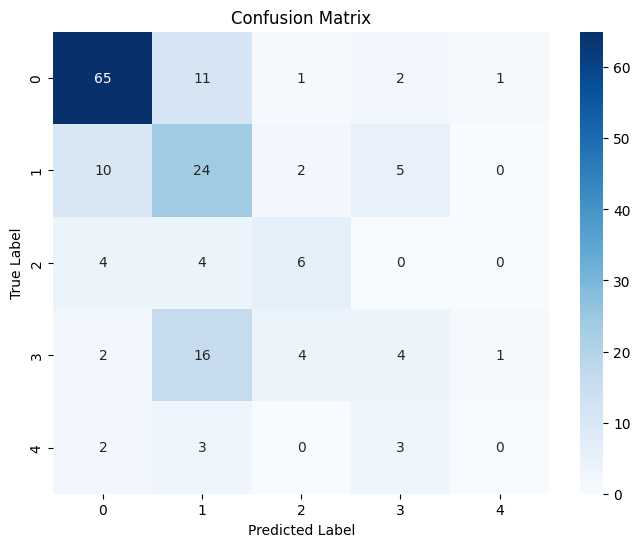

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [39]:
hd1.num.value_counts()

num
0    378
1    250
2    101
3     91
4     26
Name: count, dtype: int64

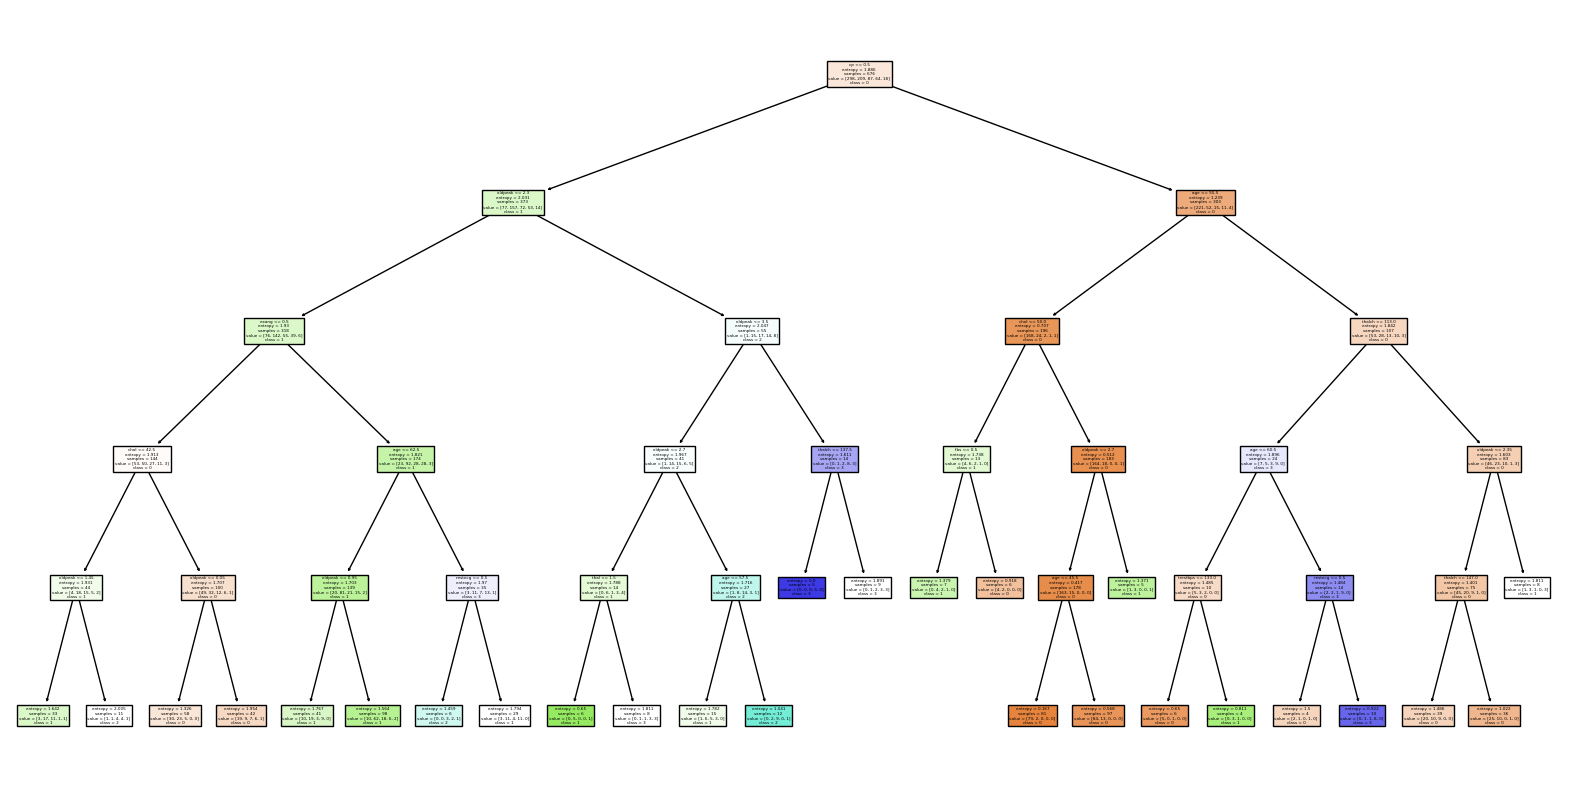

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    best_clf, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True)
plt.show()


In [41]:
feature_importances = best_clf.feature_importances_
feature_importances

array([0.16123866, 0.        , 0.31127975, 0.0168836 , 0.09217596,
       0.01628174, 0.03008907, 0.07531924, 0.04680662, 0.23536654,
       0.        , 0.01455882])

In [42]:
df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
df

,Feature,Importance
0,age,0.161239
1,sex,0.000000
2,cp,0.311280
3,trestbps,0.016884
4,chol,0.092176
5,fbs,0.016282
6,restecg,0.030089
7,thalch,0.075319
8,exang,0.046807
9,oldpeak,0.235367


In [43]:
df.sort_values(by='Importance', ascending=False)

,Feature,Importance
2,cp,0.311280
9,oldpeak,0.235367
0,age,0.161239
4,chol,0.092176
7,thalch,0.075319
8,exang,0.046807
6,restecg,0.030089
3,trestbps,0.016884
5,fbs,0.016282
11,thal,0.014559
